## Dataset Cleaning & Preprocessing

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
import pandas as pd
from ast import literal_eval
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('midi_dataframe.csv', parse_dates=[11])

# Cleaning
df.drop_duplicates(subset='file_name', inplace=True)
df.dropna(subset=['tgdb_genres'], inplace=True)
categories_filter = df.console.isin(['Medleys', 'Piano Only'])
remix_filter = df.title.str.contains('[Rr]emix')

df = df[~categories_filter & ~remix_filter]
df_stripped = df.copy()
df_stripped.title = df.title.str.replace('\(\d+\)', '').str.rstrip()
df_stripped['rank'] = df.title.str.extract('\((\d+)\)', expand=False)
df = df_stripped.sort_values(by='rank', ascending=False).groupby(['brand', 'console', 'game', 'title']).first().reset_index()
df.set_index('file_name', inplace=True)

In [3]:
num_games = len(df.groupby(['tgdb_platform', 'tgdb_gametitle']))
print('There is %d midi files, from %d games, with %d midis matched with tgdb'
      %(len(df),
        num_games,
        (df.tgdb_gametitle.notnull().sum())))
df_features = pd.read_csv('features.csv').set_index('file_name')
print("There is %d midi files with computed features"%(len(df_features)))

print("After removing not valid midi files, we have %d files"%(len(df.join(df_features, how='inner'))))

There is 22179 midi files, from 3243 games, with 22179 midis matched with tgdb
There is 31483 midi files with computed features
After removing not valid midi files, we have 22005 files


In [334]:
df_genres = df.tgdb_genres.map(literal_eval, 'ignore').apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index().set_index('file_name')
df_genres.columns = ['genre']

In [146]:
df_pred = df_genres.join(df_features, how='inner')
# For more easy displaying of the genre title on the graph
df_pred['genre'] = df_pred['genre'].apply(lambda x : x.replace("Simulator", "Sim.").replace("Simulation", "Sim.").\
             replace("Construction and Management", "C&M"))
df_pred.head()

,genre,Prevalence_of_Most_Common_Pitch,Prevalence_of_Most_Common_Pitch_Class,Relative_Prevalence_of_Top_Pitches,Relative_Prevalence_of_Top_Pitch_Classes,Interval_Between_Most_Prevalent_Pitches,Interval_Between_Most_Prevalent_Pitch_Classes,Number_of_Common_Pitches,Pitch_Variety,Pitch_Class_Variety,...,Parallel_Motion,Similar_Motion,Contrary_Motion,Oblique_Motion,Parallel_Fifths,Parallel_Octaves,Dynamic_Range,Variation_of_Dynamics,Variation_of_Dynamics_In_Each_Voice,Average_Note_to_Note_Change_in_Dynamics
file_name,,,,,,,,,,,,,,,,,,,,,
0004cc74bde3bc82f44afb5f566187c3dbcea9b2.mid,Platform,0.1593,0.2242,0.7222,0.7500,5.0,5.0,2.0,28.0,12.0,...,0.0000,0.0,0.0000,0.00000,0.0,0.0,63.0,17.65,6.3240,13.7800
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Action,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Adventure,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Sports,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Strategy,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128


## Feature Exploration & Analysis

To better understand if the research question might have foundation, it is important to explore the features produced by jSymbolic and understand if some of them might be of interest to draw correlation between game music features and game design. The approach used for this exploratory analysis was to start with the most general and top-level features and then visualise them in an appropriate way in order.

In [335]:
#For all analysis according to genre, we obviously need to group all the features per midi to a genre :
df_pred = df_pred[~(df_pred['genre'] == 'Vehicle Sim.')]
#We drop one category, the "Vehicle Simulation" genre, since only one Midi track has this genre.
groupby_genre = df_pred.groupby(by='genre')
groupby_stats = groupby_genre.describe()
games_genre = list(groupby_stats.index)

### 1. Major Or Minor

In [90]:
## Let's test a very simple feature analysis of major and minor tonality among genres.
def countMinMaj(x):
    col_of_interest = x['Major_or_Minor']
    majCount = 0
    minCount = 0
    for v in col_of_interest:
        if int(v) == 0:
            #from the documentation of the features, 
            majCount += 1
        else:
            minCount += 1
    return majCount, minCount


print('\033[1m' + "Percentage of Major pieces over all Midis per genre" + '\033[0m')
groupby_genre.apply(countMinMaj).apply(lambda x: 100*(x[0]/(x[0]+x[1])))

Percentage of Major pieces over all Midis per genre


genre
Action           98.767918
Adventure        98.476946
C&M Sim.        100.000000
Fighting         97.508126
Flight Sim.     100.000000
Horror           98.701299
Life Sim.       100.000000
MMO              85.333333
Music            99.000000
Platform         98.517331
Puzzle           97.704254
Racing           99.630996
Role-Playing     98.136266
Sandbox          98.734177
Shooter          99.330357
Sports           98.037467
Stealth         100.000000
Strategy         97.351598
dtype: float64

Those results seems to indicate that for all genres, the vast majority of the pieces are in Major, which is a surprising result to find. However, the feature description in the jSymbolic documentation states the following : 

"_
Whether the piece is major or minor, as indicated by the first encountered major/minor metadata tag in the piece. Set to 0 if the metadata indicates that the piece is major, or set to 1 if the metadata indicates that it is minor. Defaults to 0 if the key signature is unknown._"

Thus, jSymbolic decides on the tonality of the piece according to only the metadata of the MIDI file. Considering the dataset is user-contributed, it is definitely likely that not all user provided a tonality for their song encoding, and since jSymbolic default the encoding of unknown key signature to Major, we obtain this apparently skewed distribution toward Major keys. This is definitely some kind of critic that could be emitted about jSymbolic's design choices, why not assign another integer in the case of unknown key? Although it would possible to count all pieces with unkown key, without using jSymbolic, the close to 1 or 2 percent of minor keys detected seems to imply that few tgmdb sequencers  annotated the key of their MIDI (if we assume an equivalent percentage of major key annotated). Thus this would mean that most of the data has an unknown key according to this feature.

In conclusion, this feature cannot be interpreted to explain some kind of pattern of key according to the genre (i.e., we cannot use this feature for our research question)

### 2. Duration

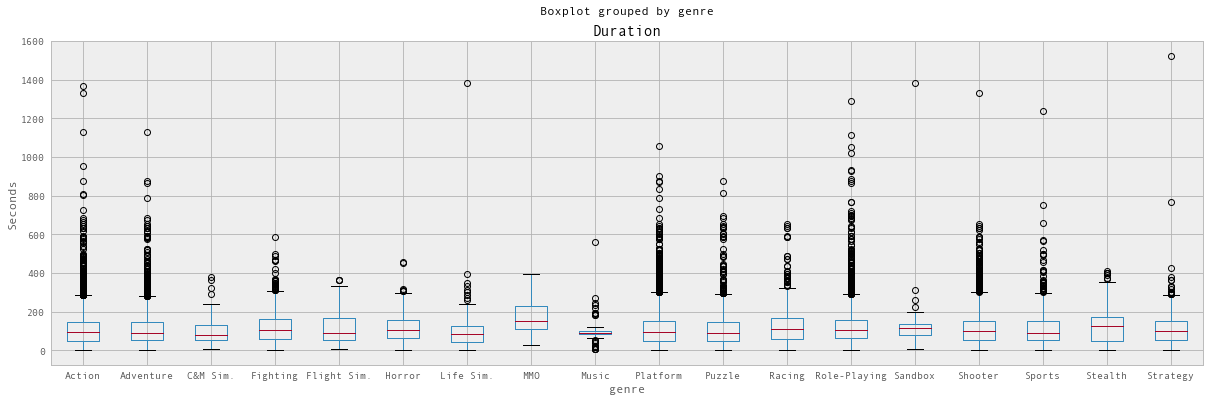

In [339]:
fig, ax = plt.subplots(figsize=(20,6))
plt.suptitle('')
df_pred.boxplot(column='Duration', by='genre', ax=ax)
ax.set_ylabel('Seconds')
plt.show()

Except for two specific game genres, the boxplots above show that the majority of the MIDIs have an IQR concentrated between 50 to 150 seconds, regardless of game genre. This seems to indicate no correlation can be drawn between duration of music pieces and game genre. 

The first noteworthy exception, is MMO's game music. Its IQR range from 115 to 225 seconds, considerably higher than other genres, and its the only genre to not have outliers. This difference can easily be explained from a game design point of view : MMO are designed to be played longer than other games, due to their monthly subscription system, in opposition of the "buy once" system of most other games. Thus, the player needs to be constantly entertained, and should feel bored at a later rate than normal games, having longer songs to hear means they will likely hear less frequently such song, thus dimishing the sense of boredom.

The second exception is Music's (or more commonly called "Rhythm") game music, which has a very narrow IQR ranging from 83 to 99 seconds, with its minimum and maximum close to this range. Upon inspecting what type of game are classified under the "music" genre, mainly games from the "Dance Dance Revolution" franchise are present. As its name tells, this is a dancing simulator franchise. Therefore it makes sense from a game design perpective to have consistently short songs, as dancing can easily be exhausting to the casual player short songs are easier to digest. The standardized duration makes it so that players are not hesitating to enter a dance that might be too long or not, as they know what song length to expect. 

In [340]:
music_genre_df = df[df['tgdb_genres'] == '[\'Music\']']
music_genre_df.groupby(by='game').describe()['tgdb_id']['count']

game
Beatmania - Complete Mix              1.0
Beatmania IIDX                        9.0
Beatmania IIDX 3rd Style              1.0
Beatmania IIDX 7th Style              3.0
Dance Dance Revolution 1st Mix        1.0
Dance Dance Revolution 3rd Mix       12.0
Dance Dance Revolution 4th Mix       11.0
Dance Dance Revolution 5th Mix        4.0
Dance Dance Revolution 6th MIX        1.0
Dance Dance Revolution 6th Mix        6.0
Dance Dance Revolution 7th Mix        6.0
Dance Dance Revolution 8th Mix       11.0
Dance Dance Revolution Disney Mix     1.0
Dance Dance Revolution Extreme        2.0
Dance Dance Revolution Max 2          1.0
Dance Dance Revolution: Konamix       2.0
Dance Dance Revolution: Mario Mix     1.0
Dancing Stage Euromix                 1.0
Elite Beat Agents                     3.0
Gitaroo Man                           1.0
PaRappa the Rapper                    1.0
PaRappa the Rapper 2                  1.0
Rhythm Heaven                         5.0
Um Jammer Lammy              

### 3. Pitch Registers 

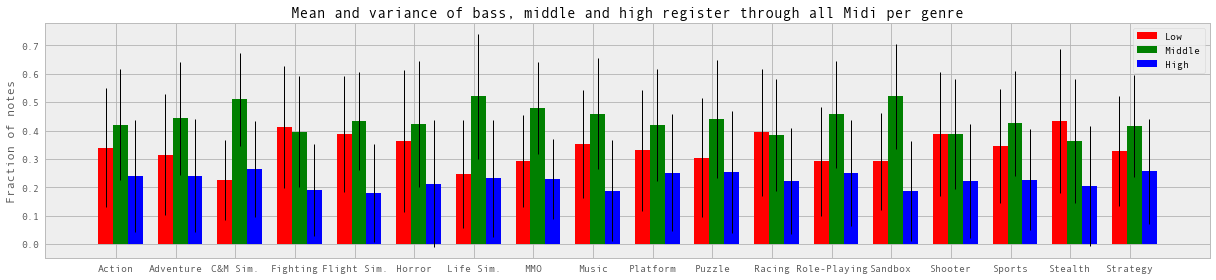

In [347]:
#Dynamic range distribution according to genre :
hi = "Importance_of_High_Register"
mid = "Importance_of_Middle_Register"
lo = "Importance_of_Bass_Register"

dyn_df = groupby_stats[[hi, mid, lo]]    
ind = np.arange(len(dyn_df))
fig, ax = plt.subplots()
width = 0.25
rects_lo = ax.bar(ind, dyn_df[lo]['mean'], width, color='r', yerr=dyn_df[lo]['std'])
rects_mi = ax.bar(ind+width, dyn_df[mid]['mean'], width, color='g', yerr=dyn_df[mid]['std'])
rects_hi = ax.bar(ind+2*width, dyn_df[hi]['mean'], width, color='b', yerr=dyn_df[hi]['std'])
    
ax.legend((rects_lo[0], rects_mi[0], rects_hi[0]), ('Low', 'Middle', 'High'))
ax.set_xticks(ind + (width+0.1) / 2)
ax.set_xticklabels(games_genre)

ax.set_title('Mean and variance of bass, middle and high register through all Midi per genre')
ax.set_ylabel('Fraction of notes')
fig.set_size_inches((17,4))
plt.tight_layout()
plt.show()


The feature of Bass/Middle/High register is simply the fraction of all notes of a certain Midi Pitch range over the total number of notes. jSymbolic mapped the three registers this way : 
* Bass => [0, 54] 
* Middle => [55, 72] 
* High => [73, 128]

As showed by the black line on the bars, there is a pretty huge variance for all values of frequency register, which indicates that each game genre does not seem to have a signature pitch range register. If the focus is put on the mean only, all MIDI have the rather same register distribution: most notes are in the middle, then a considerable part in the low, and a minority in the High. Only 4 genres seems to break away from this trend : Racing, Shooter, Fighting, and Stealth games. All of them have a Low register that is higher or as strong as the middle one. The only common point between those games genres is a loose competitive/high-scoring component. This might be far-fetched, but low pitches could be reminiscent of masculine sounds to player, and thus evoke some viril comportement that could drive the player to be more engaged in competitive game play. However this hypothesis should be considered very weak in regard to the research question as the huge variance could mean such pattern would be a statistical mishap.

### 4. Rhytmic Metrics

#### 4.1. Tempo

Number of midis filtered because of hellish tempo : 52


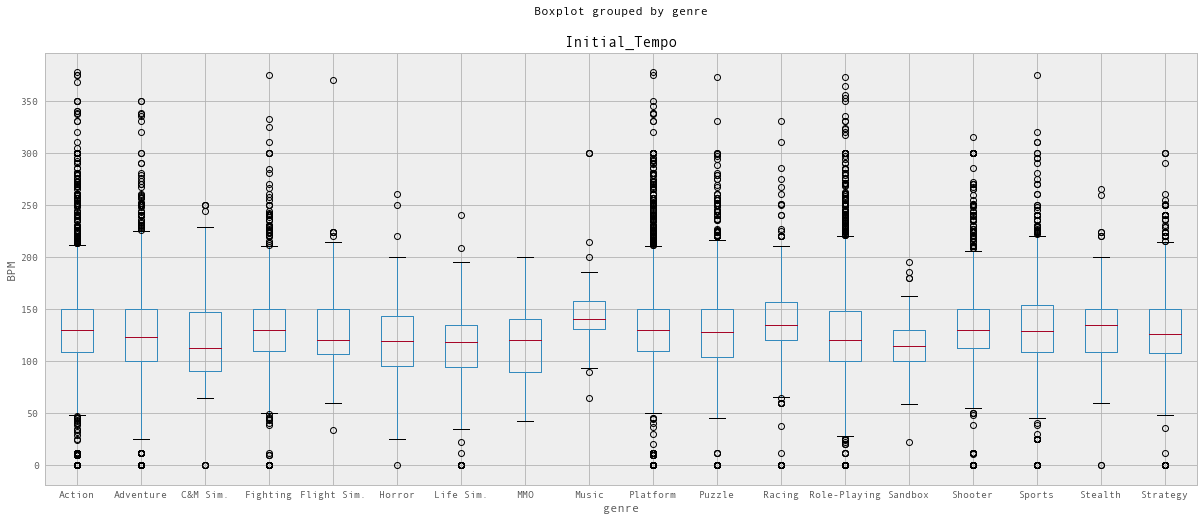

In [264]:
#Initial tests showed that a group of songs scored an initial tempo above of 400. 
midi_filtered = len(df_pred[df_pred['Initial_Tempo'] >= 400])
df_pred_tempo_filt = df_pred[df_pred['Initial_Tempo'] < 400]
fig, ax = plt.subplots(figsize=(20,8))
plt.suptitle('')
df_pred_tempo_filt.boxplot(column='Initial_Tempo', by='genre', ax=ax)
ax.set_ylabel('BPM')
print("Number of midis filtered because of hellish tempo : "+ str(midi_filtered))
plt.show()

52 Midis were left out of the analysis, as they had tempo of over 400, which seems like a unrealistic bpm probably set by unexperienced or foolish users from tgmdb archive.
Before interpreting the results, it should be noted that tempo does not necessarily correlate with a song speed, or perceived fastness. A song apparently in 180 BPM could only have whole notes through the whole piece, thus giving a very slow-paced feeling for a high tempo. Also, a user might sequence a video game music of 120 BPM into a MIDI of 60 BPM, mapping quarter notes to eighth notes.

Initial Tempo shows more difference between genres than MIDI duration already. The most remarkable genre is again the "Music" one, with a narrow high-placed IQR. This is quite obvious considering that most of the Music games are dance simulator, and more rhytmed songs are more enjoyable to dance for the common player.

Racing Games also seems to have higher tempo than most of the other genres, which would maybe encourage player to display a more nervous game play style to drive them to the finish line faster.

Sanbox games on the opposite, have more slow-paced midis, which would go along with the game design choice of exploration, limitless discovering and building that goes along with sandbox games.


#### 4.2.1 Temporal Metrics

In [258]:
#df_compact_metrics['genre'] = df_pred['genre']
df_pred['QTC_Meter'] = df_pred.apply(lambda x:\
                                              str(int(x.Quintuple_Meter))+\
                                              str(int(x.Triple_Meter))+\
                                              str(int(x.Compound_Or_Simple_Meter)), axis=1)

def countMeters(x):
    sub_df = x['QTC_Meter']
    compound_bin = 0
    triple_bin = 0
    quint_bin = 0
    simple_bin = 0
    coun = 0
    
    for row in sub_df:
        if row[0] == '1':
            quint_bin += 1
        elif row[1] == '1':
            triple_bin += 1
        elif row[2] == '1':
            compound_bin += 1
        else:
            simple_bin += 1
        coun += 1
    return simple_bin/coun, compound_bin/coun, triple_bin/coun, quint_bin/coun, coun
meters_frac = df_pred[['genre','QTC_Meter']].groupby(by='genre').apply(countMeters)

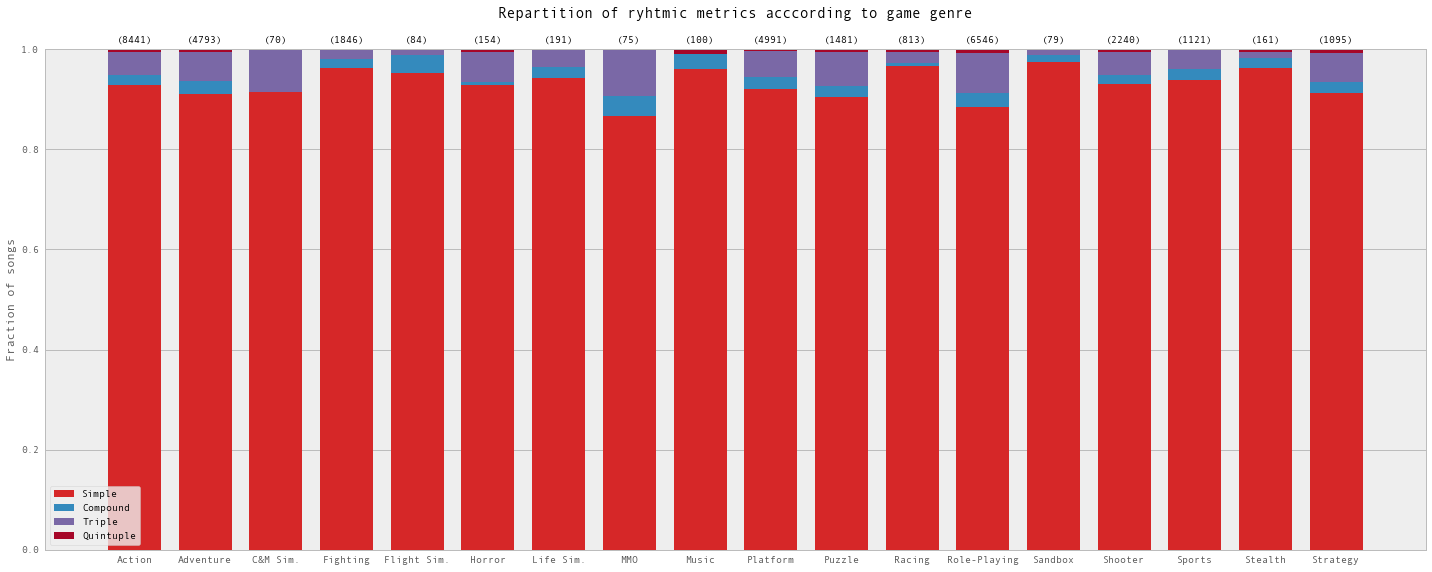

In [348]:
g_arr = []
bars = [[],[],[],[],[]]
METRIC_CLASS = 5
for k,v in meters_frac.items():
    g_arr.append(k)
    for i in range(METRIC_CLASS):
        bars[i].append(v[i])

ind = np.arange(len(g_arr))
fig, ax = plt.subplots(figsize=(20,8))
width = 0.75
p0 = ax.bar(ind, bars[0], width, color='#d62728')
p1 = ax.bar(ind, bars[1], width, bottom=bars[0])
p2 = ax.bar(ind, bars[2], width, bottom=np.array(bars[1])+np.array(bars[0]))
p3 = ax.bar(ind, bars[3], width, bottom=np.array(bars[2])+np.array(bars[1])+np.array(bars[0]))

ax.legend((p0[0], p1[0], p2[0], p3[0]), ('Simple','Compound', 'Triple', 'Quintuple'))
ax.set_xticks(ind)
ax.set_xticklabels(g_arr)
ax.set_ylabel('Fraction of songs')
ax.set_title('Repartition of ryhtmic metrics acccording to game genre',y=1.05)

#labeling MIDI count per genre : 
for i in range(len(g_arr)):
    ax.text(ind[i], 1.01,
                '(%d)' % int(bars[4][i]),
                ha='center', va='bottom')
#plt.yticks(np.arange(0, 1.2, 10))
plt.tight_layout()
plt.show()

The 4 categories displayed here come frome 3 features that together, are able to indicate which metric the MIDI piece starts in. The "triple" feature means wether the numerator of the time signature is 3 (3/4, 3/8, etc...), similarly, "quintuple" means a 5 for the time signature's numerator (5/4, 5/8, etc...). "Compound" means that the numerator is a multiple of 3 greater than or equal to 6, but evenly divisible (so 6/4, 6/8, 12/8, etc...). If none of those features are set to the truth value of 1.0, then the MIDI is in simple metric (i.e. 2/2, 4/4, 8/8, etc...). This again shows a small limitation of the design, as there exists no feature to account for other odd time signature such as 7/8, 15/16 and others. It would seem likely that such pieces occur rarely in practice. Nonetheless they would be mapped to the "simple" category in the jSymbolic system which is erronous.
As with most features seen up until now, no conclusion can be drawn out of those feature other that than the vast majority of the dataset (more than 90% for each genre) is in simple metric. Such a finding obviously does not help differentiate game genre out of the game music. 

#### 4.2.2 Metrical Diversity

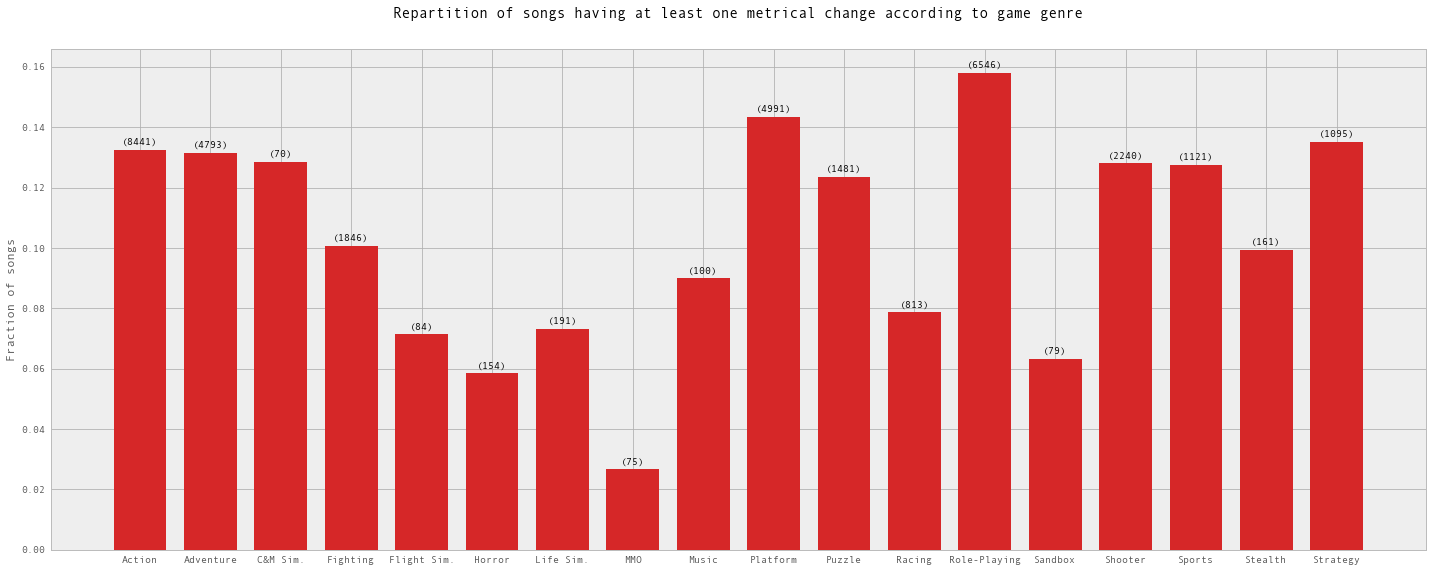

Fraction of pieces with metric change : 0.13


In [351]:
g_arr = []
metricFrac = []
count = []
resMean = groupby_stats['Metrical_Diversity']['mean']
for k,v in resMean.items():
    g_arr.append(k)
    metricFrac.append(v)
resCount = groupby_stats['Metrical_Diversity']['count']
for _,v in resCount.items():
    count.append(v)

ind = np.arange(len(g_arr))
fig, ax = plt.subplots(figsize=(20,8))
width = 0.75
ax.bar(ind, resMean, width, color='#d62728')

ax.set_xticks(ind)
ax.set_xticklabels(g_arr)
ax.set_ylabel('Fraction of songs')
ax.set_title('Repartition of songs having at least one metrical change according to game genre',y=1.05)

#labeling MIDI count per genre : 
for i in range(len(g_arr)):
    ax.text(ind[i], resMean[i]+0.001,
                '(%d)' % int(resCount[i]),
                ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("Fraction of pieces with metric change : %.2lf"%(df_pred['Metrical_Diversity'].mean()))


There exists a fourth feature related to a song's metric, which indicates wether a Midi piece encounter at least one metric change from the beginning until the end. Surprisingly, this features shows great variety between all genres. It should be noted however that this feature only applies to 13% of midi pieces of the dataset.
The most noteworthy genre with this feature, is Role-Playing, whose 16% of songs have metric change in it. Metric change in a song oftens brings some progressive elements to the listener ear, as changing metric changes the flow and anticipiation of song. In the case of role-playing game, this could reflect the more complex game-play and possibilities of changing the pace the player can have with character customization which is a core feature of role-playing game. 

However this hypothesis should be considered weak as the role-playing genre only has 3% more than the mean of all the games for this feature, and this argument could be applied to other genre that have a close portion to this score. Notably, the MMO genre display a very low percentage of 3% of metric change for all its midi piece. This results si quite astonishing as the MMO genre is often coupled with the RPG one (notable example such as World Of Warcraft, Guild of Wars, Elder Scrolls Online come to mind), but this weird inbalance might just come from a small bias in representativeness, as only 79 midi represent the MMO genre in this feature analysis.  

FEATURE ANALYSIS & DROP THEM

Drop loudness because user submitted.
Drop Glissando & Vibrato because no insurance over the 
Drop Microtone Prevalence because pretty low representation.

In [306]:
groupby_stats['Microtone_Prevalence']

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,8441.0,0.008941,0.070313,0.0,0.0,0.0,0.000000,1.00000
Adventure,4793.0,0.006842,0.061991,0.0,0.0,0.0,0.000000,1.00000
C&M Sim.,70.0,0.014208,0.046511,0.0,0.0,0.0,0.001257,0.26320
Fighting,1846.0,0.009509,0.080210,0.0,0.0,0.0,0.000244,1.00000
Flight Sim.,84.0,0.006403,0.049907,0.0,0.0,0.0,0.000000,0.45740
Horror,154.0,0.003541,0.023081,0.0,0.0,0.0,0.000000,0.28140
Life Sim.,191.0,0.005924,0.060477,0.0,0.0,0.0,0.000000,0.83300
MMO,75.0,0.002080,0.008952,0.0,0.0,0.0,0.000000,0.07273
Music,100.0,0.001455,0.005688,0.0,0.0,0.0,0.000000,0.04459
